In [127]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from torch import permute
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torchvision import datasets, transforms
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [3]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
temp_dataset = datasets.ImageFolder('dataset1/', transform=transform)
temp_loader = DataLoader(temp_dataset, batch_size = 5, shuffle = True, num_workers=4, pin_memory= True)
for images, _ in temp_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=5).permute(1,2,0))
#     break

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 143, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 143, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/home/aaryan/py/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 163, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 255, 255] at entry 0 and [3, 266, 255] at entry 1


In [2]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

In [3]:
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	fig = plt.figure("{} batch".format(dataset_type),
        figsize=(10, 10))
	# loop over the batch size
	for i in range(0, 10):
		# create a subplot
		ax = plt.subplot(2, 5, i + 1)
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
		image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx]
		# show the image along with the label
		plt.imshow(image)
		plt.title(label)
		plt.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()


In [4]:
resize = transforms.Resize(size=(255,255))

In [5]:
transform = transforms.Compose([resize,
                                transforms.CenterCrop(255),
                                transforms.ToTensor()])

In [6]:
dataset = ImageFolder(root='dataset1/',transform=transform)

In [7]:
trainDataLoader = DataLoader(dataset, batch_size=10, shuffle=True)

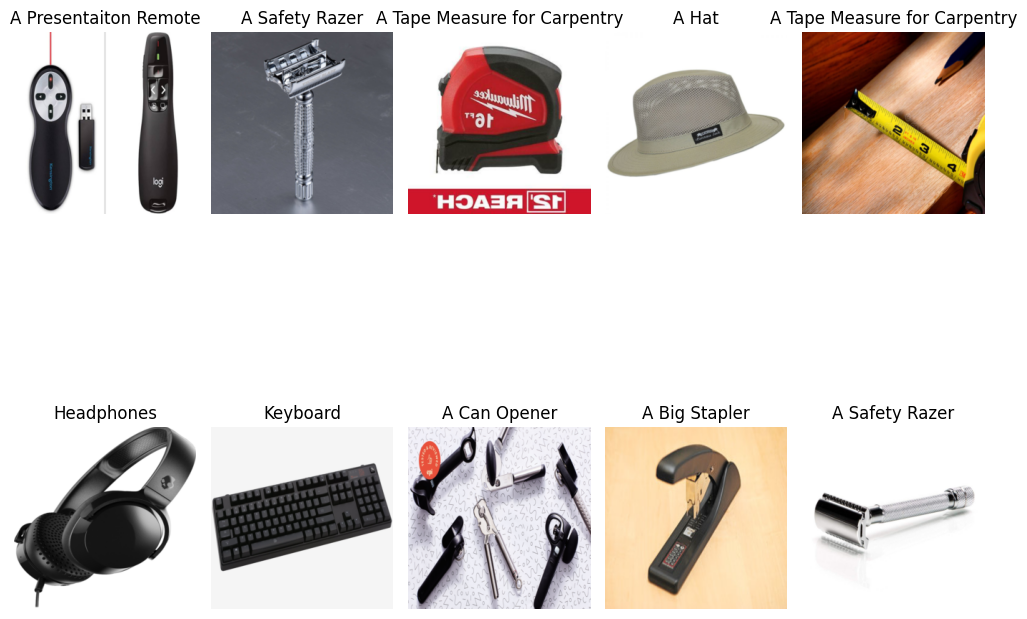

In [8]:
trainBatch = next(iter(trainDataLoader))
visualize_batch(trainBatch, dataset.classes, "train")

In [9]:
dataset.classes[0] = (0,1)

In [10]:
dataset.classes[trainBatch[1][0]]

'A Presentaiton Remote'

In [11]:
dataset.classes

[(0, 1),
 'A Can Opener',
 'A Drill',
 'A Hair Dryer',
 'A Hammer',
 'A Hat',
 'A Hose Splitter',
 'A Pair Of Shoes',
 'A Presentaiton Remote',
 'A Red lego brick',
 'A Safety Razer',
 'A Small Stapler',
 'A TV Remote',
 'A Tape Measure for Carpentry',
 'An Umbrella',
 'Bed side Clock',
 'Computer Mouse',
 'Google Cardboard',
 'Headphones',
 'Keyboard',
 'Toaster']

In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('Data.csv')

In [71]:
df.head()

,Class,True Weight Ibs,Length,Width,Height,Length(cm),Width(cm),Height(cm),Volume,Weight(kg)
0,Big Elephant,1.283,4.80,2.25,4.250,12.192,5.715,10.7950,752.166238,0.581969
1,Small Elephant,0.517,3.75,1.50,3.000,9.525,3.810,7.6200,276.531705,0.234511
2,Big Bowl,1.248,6.75,6.75,3.500,17.145,17.145,8.8900,2613.224612,0.566093
3,Small Bowl,0.332,4.00,4.00,2.125,10.160,10.160,5.3975,557.160176,0.150595
4,A Hose Splitter,0.412,2.50,3.00,1.750,6.350,7.620,4.4450,215.080215,0.186883


In [72]:
df1 = df.drop(['True Weight Ibs','Length','Width','Height','Length(cm)','Width(cm)','Height(cm)'],axis=1)

In [73]:
df1.head()

,Class,Volume,Weight(kg)
0,Big Elephant,752.166238,0.581969
1,Small Elephant,276.531705,0.234511
2,Big Bowl,2613.224612,0.566093
3,Small Bowl,557.160176,0.150595
4,A Hose Splitter,215.080215,0.186883


In [74]:
df1

,Class,Volume,Weight(kg)
0,Big Elephant,752.166238,0.581969
1,Small Elephant,276.531705,0.234511
2,Big Bowl,2613.224612,0.566093
3,Small Bowl,557.160176,0.150595
4,A Hose Splitter,215.080215,0.186883
5,Kitchen Knife,145.947289,0.104328
6,Screwdriver,185.634709,0.106142
7,Google Cardboard,903.336903,0.070762
8,Wooden Spoon,359.491217,0.059875
9,A Big Stapler,397.514326,0.166925


In [75]:
a = open("real.txt","r")
real = a.read()
a.close()
real_li = real.split('\n')
real_li

['A Hose Splitter',
 'Google Cardboard',
 'A Big Stapler',
 'A Small Stapler',
 'A Can Opener',
 'Computer Mouse',
 'A Presentation Remote',
 'A TV Remote',
 'A Hammer',
 'A Drill',
 'A Safety Razer',
 'A Tape Measure for Carpentry',
 'A Red lego brick',
 'A Hat',
 'Headphones',
 'Keyboard',
 'Bed side Clock',
 'Toaster',
 'A Pair Of Shoes',
 'A Hair Dryer',
 'An Umbrella']

In [76]:
li = []
for i in range(df1.shape[0]):
    if df1['Class'][i] not in real_li:
        li.append(i)
df2 = df1.drop(li)

In [77]:
df2

,Class,Volume,Weight(kg)
4,A Hose Splitter,215.080215,0.186883
7,Google Cardboard,903.336903,0.070762
9,A Big Stapler,397.514326,0.166925
10,A Small Stapler,76.814363,0.044906
11,A Can Opener,401.483068,0.177811
12,Computer Mouse,291.894578,0.133812
13,A Presentation Remote,114.709448,0.057607
19,A TV Remote,460.886175,0.189151
21,A Hammer,848.030562,0.470837
22,A Drill,2717.384888,1.208390


In [78]:
df2['Class'][4]

'A Hose Splitter'

In [79]:
li = list(df2['Class'])

In [80]:
li

['A Hose Splitter',
 'Google Cardboard',
 'A Big Stapler',
 'A Small Stapler',
 'A Can Opener',
 'Computer Mouse',
 'A Presentation Remote',
 'A TV Remote',
 'A Hammer',
 'A Drill',
 'A Safety Razer',
 'A Tape Measure for Carpentry',
 'A Red lego brick',
 'A Hat',
 'Headphones',
 'Keyboard',
 'Bed side Clock',
 'Toaster',
 'A Pair Of Shoes',
 'A Hair Dryer',
 'An Umbrella']

In [81]:
df2['Class'][4]

'A Hose Splitter'

In [82]:
df2['Class']

4                  A Hose Splitter
7                 Google Cardboard
9                    A Big Stapler
10                 A Small Stapler
11                    A Can Opener
12                  Computer Mouse
13           A Presentation Remote
19                     A TV Remote
21                        A Hammer
22                         A Drill
26                  A Safety Razer
27    A Tape Measure for Carpentry
29                A Red lego brick
35                           A Hat
42                      Headphones
45                        Keyboard
46                  Bed side Clock
47                         Toaster
49                 A Pair Of Shoes
51                    A Hair Dryer
52                     An Umbrella
Name: Class, dtype: object

In [83]:
df2.loc['A Hat']

KeyError: 'A Hat'

In [84]:
df3 = pd.DataFrame(df2,columns =['Class', 'Volume','Weight(kg)'])

In [85]:
df3

,Class,Volume,Weight(kg)
4,A Hose Splitter,215.080215,0.186883
7,Google Cardboard,903.336903,0.070762
9,A Big Stapler,397.514326,0.166925
10,A Small Stapler,76.814363,0.044906
11,A Can Opener,401.483068,0.177811
12,Computer Mouse,291.894578,0.133812
13,A Presentation Remote,114.709448,0.057607
19,A TV Remote,460.886175,0.189151
21,A Hammer,848.030562,0.470837
22,A Drill,2717.384888,1.208390


In [86]:
df3.set_index("Class", inplace = True)

In [87]:
a = df3.loc['A Hammer']

In [88]:
li = list(df3.index)
li

['A Hose Splitter',
 'Google Cardboard',
 'A Big Stapler',
 'A Small Stapler',
 'A Can Opener',
 'Computer Mouse',
 'A Presentation Remote',
 'A TV Remote',
 'A Hammer',
 'A Drill',
 'A Safety Razer',
 'A Tape Measure for Carpentry',
 'A Red lego brick',
 'A Hat',
 'Headphones',
 'Keyboard',
 'Bed side Clock',
 'Toaster',
 'A Pair Of Shoes',
 'A Hair Dryer',
 'An Umbrella']

In [89]:
def load_imgs(path_to_imgDir, path_to_csv):
    """
    
    """
    df = pd.read_csv(path_to_csv)
    df = df.drop(['True Weight Ibs','Length','Width','Height','Length(cm)','Width(cm)','Height(cm)'],axis=1)
    a = open("real.txt","r")
    real = a.read()
    a.close()
    real_li = real.split('\n')
    li = []
    for i in range(df.shape[0]):
        if df['Class'][i] not in real_li:
            li.append(i)
    df = df.drop(li)
    df.set_index("Class", inplace = True)
#     print(df)
    resize = transforms.Resize(size=(255,255))
    transform = transforms.Compose([resize,
                                transforms.CenterCrop(255),
                                transforms.ToTensor()])
    dataset = ImageFolder(root=path_to_imgDir,transform=transform)
    for i in range(0,len(dataset.classes)):
        if dataset.classes[i] in list(df.index):
            temp = df.loc[dataset.classes[i]]
            dataset.classes[i] = np.array([temp[0],temp[1]])
    for i in range(0,len(dataset.targets)):
        dataset.targets[i] = dataset.classes[dataset.targets[i]]
    return dataset

In [129]:
dataset = load_imgs('data/','Data.csv')
dataLoad = DataLoader(dataset, batch_size=10, shuffle=True)

In [130]:
def main():
    trainBatch = next(iter(dataLoad))
    visualize_batch(trainBatch, dataset.classes, "train")

/home/aaryan/py/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


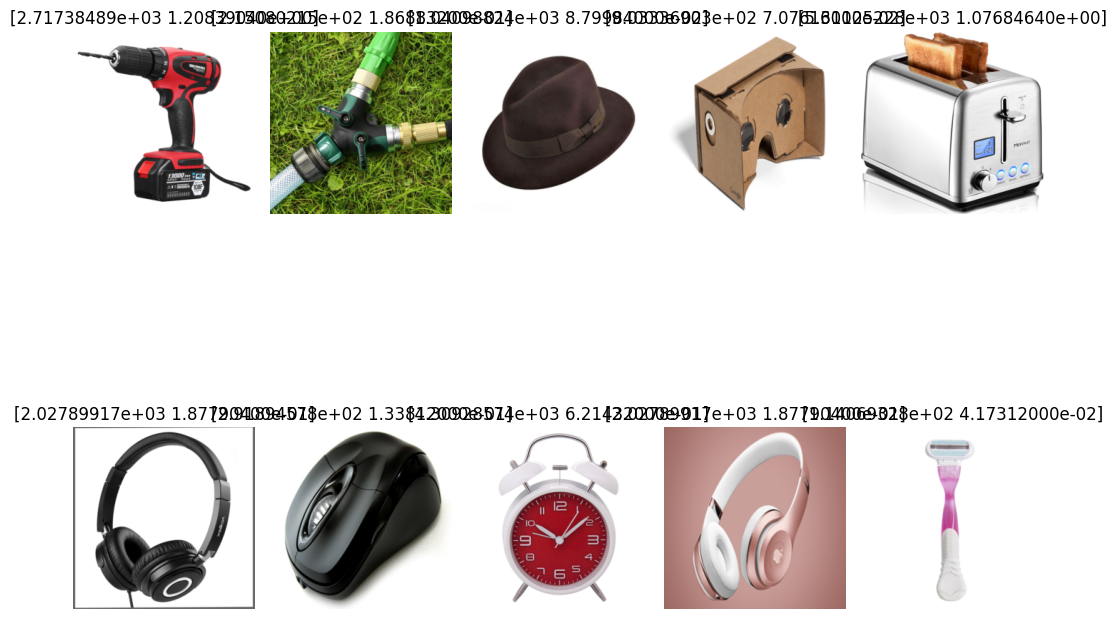

In [92]:
main()

In [93]:
df = pd.read_csv('Data.csv')
df = df.drop(['True Weight Ibs','Length','Width','Height','Length(cm)','Width(cm)','Height(cm)'],axis=1)
a = open("real.txt","r")
real = a.read()
a.close()
real_li = real.split('\n')
li = []
for i in range(df.shape[0]):
    if df['Class'][i] not in real_li:
        li.append(i)
df = df.drop(li)
df.set_index("Class", inplace = True)

In [86]:
for i in range(0,len(dataset.classes)):
    if dataset.classes[i] in list(df.index):
        temp = df.loc[dataset.classes[i]]
        dataset.classes[i] = np.array([temp[0],temp[1]])

In [94]:
dataset.classes

[array([3.97514326e+02, 1.66924800e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([5.41313885e+03, 5.99205600e-01]),
 array([8.48030562e+02, 4.70836800e-01]),
 array([1.04098824e+03, 8.79984000e-02]),
 array([2.15080215e+02, 1.86883200e-01]),
 array([6.3142635e+02, 7.2576000e-02]),
 array([1.14709448e+02, 5.76072000e-02]),
 array([4.6090461e+01, 1.1793600e-02]),
 array([1.14069328e+02, 4.17312000e-02]),
 array([7.68143625e+01, 4.49064000e-02]),
 array([4.60886175e+02, 1.89151200e-01]),
 array([189.2705892,   0.1941408]),
 array([7.0976471e+03, 6.5136960e-01]),
 array([4.30928574e+03, 6.21432000e-01]),
 array([2.91894578e+02, 1.33812000e-01]),
 array([9.03336903e+02, 7.07616000e-02]),
 array([2.02789917e+03, 1.87790400e-01]),
 array([1.99609802e+03, 8.01964800e-01]),
 array([5.31125228e+03, 1.07684640e+00])]

In [95]:
dataset.targets

[array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([3.97514326e+02, 1.66924800e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([5.41313885e+03, 5.99205600e-01]),
 array([5.41313885e+03, 5.99205600e-01]),
 array([5.41313885e+03, 5.99205600

In [47]:
dataset.classes

[array([3.97514326e+02, 1.66924800e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([5.41313885e+03, 5.99205600e-01]),
 array([8.48030562e+02, 4.70836800e-01]),
 array([1.04098824e+03, 8.79984000e-02]),
 array([2.15080215e+02, 1.86883200e-01]),
 'A Pair Of Shoes',
 'A Presentaiton Remote',
 array([4.6090461e+01, 1.1793600e-02]),
 array([1.14069328e+02, 4.17312000e-02]),
 array([7.68143625e+01, 4.49064000e-02]),
 array([4.60886175e+02, 1.89151200e-01]),
 array([189.2705892,   0.1941408]),
 array([7.0976471e+03, 6.5136960e-01]),
 array([4.30928574e+03, 6.21432000e-01]),
 array([2.91894578e+02, 1.33812000e-01]),
 array([9.03336903e+02, 7.07616000e-02]),
 array([2.02789917e+03, 1.87790400e-01]),
 array([1.99609802e+03, 8.01964800e-01]),
 array([5.31125228e+03, 1.07684640e+00])]

In [55]:
dataset.target_transform?

In [112]:
trainDataLoader = DataLoader(dataset, batch_size=5, shuffle=True)

In [60]:
dataset.classes

[array([3.97514326e+02, 1.66924800e-01]),
 array([4.01483068e+02, 1.77811200e-01]),
 array([2.71738489e+03, 1.20839040e+00]),
 array([5.41313885e+03, 5.99205600e-01]),
 array([8.48030562e+02, 4.70836800e-01]),
 array([1.04098824e+03, 8.79984000e-02]),
 array([2.15080215e+02, 1.86883200e-01]),
 'A Pair Of Shoes',
 'A Presentaiton Remote',
 array([4.6090461e+01, 1.1793600e-02]),
 array([1.14069328e+02, 4.17312000e-02]),
 array([7.68143625e+01, 4.49064000e-02]),
 array([4.60886175e+02, 1.89151200e-01]),
 array([189.2705892,   0.1941408]),
 array([7.0976471e+03, 6.5136960e-01]),
 array([4.30928574e+03, 6.21432000e-01]),
 array([2.91894578e+02, 1.33812000e-01]),
 array([9.03336903e+02, 7.07616000e-02]),
 array([2.02789917e+03, 1.87790400e-01]),
 array([1.99609802e+03, 8.01964800e-01]),
 array([5.31125228e+03, 1.07684640e+00])]

In [119]:
for batch_idx, (data, target) in enumerate(trainDataLoader):
#     print(data)
    print(target)
    break

tensor([16,  8, 15, 17,  2])


In [120]:
batch_idx = 0
for (data,target) in zip(trainDataLoader)

TypeError: 'DataLoader' object cannot be interpreted as an integer

[[4.01483068e+02 1.77811200e-01]
 [2.71738489e+03 1.20839040e+00]
 [4.01483068e+02 1.77811200e-01]
 [4.01483068e+02 1.77811200e-01]
 [3.97514326e+02 1.66924800e-01]]
Feature batch shape: torch.Size([5, 3, 255, 255])
Labels batch shape: torch.Size([5])


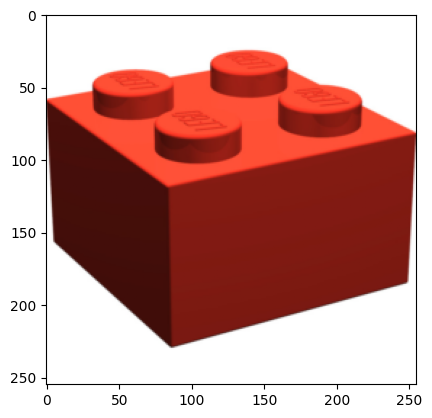

Label: 9


In [138]:
# Display image and label.
train_features, train_labels = next(iter(trainDataLoader))
target = np.array([trainDataLoader.dataset.targets[i] for i in train_labels])
print(target)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# print(train_features[0].squeeze())
img = permute(train_features[0].squeeze(),(1,2,0))
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
train_ds, val_ds = 